In [1]:
# ----------------------------------------------------------------
#  Author:        TFT
#  Written:       4/23/2018
#  Last updated:  4/25/2018
#
#  Execution:     python3 SoftmaxRegression_mnist.py
#
#  TFT Machine Learning
#  Assignment  Week 2-2
#
#  Complete your code between "YOUR CODE HERE" and "END CODE".
#  Donn't modify other code!
#  % python3 SoftmaxRegression_mnist.py
#  the accuracy will reach 90% after about 1000 steps of training
#----------------------------------------------------------------

In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
# load the dataset
mnist = input_data.read_data_sets("data", one_hot = True) # labels are "one-hot vectors"

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


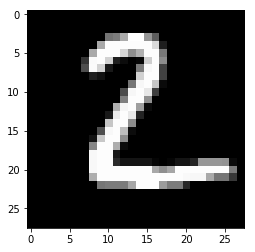

In [4]:
first_image = mnist.test.images[1]
first_image = np.array(first_image, dtype = 'float')
pixels = first_image.reshape(28, 28)
plt.imshow(pixels, cmap = 'gray')
plt.show()

In [6]:
# load the dataset
mnist = input_data.read_data_sets("data", one_hot = True) # labels are "one-hot vectors"

# parameters
################################################################################
### YOUR CODE HERE: 2 lines
### Hint: What data type should we use here? What dimension should W and b have?
W = tf.Variable(tf.random_normal(shape = [28*28, 10], stddev = 0.01), name = "W")
b = tf.Variable(tf.zeros([1, 10]))
### END CODE
################################################################################
learning_rate = 0.1
momentum = 0.9
batch_size = 64
max_iter = 1000

# inputs & target outputs
################################################################################
### YOUR CODE HERE: 2 lines
### Hint: What data type should we use here? What dimension should x and y_ have?
x = tf.placeholder(tf.float32, [None, 28*28], name = "x_placeholder")
y_ = tf.placeholder(tf.int32, [None, 10], name = "y__placeholder")
### END CODE
################################################################################

# creat model
################################################################################
### YOUR CODE HERE: 1 line
y = tf.matmul(x, W) + b
### END CODE
################################################################################

# loss function
################################################################################
### YOUR CODE HERE: 1 line
### Hint: look up "softmax_cross_entropy_with_logits" in Tensorflow official documation
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = y, labels = y_, name = "loss"))
### END CODE
################################################################################

# optimizer
# optimizer = tf.train.GradientDescentOptimizer(learning_rate)
optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
train_step = optimizer.minimize(cross_entropy)

# accuracy test
################################################################################
### YOUR CODE HERE: 1 line
### Hint: look up "tf.argmax" in Tensorflow official documation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
### END CODE
################################################################################

# training
init = tf.global_variables_initializer()
### Hint: remember to initialze Variables; remember to feed placeholders
with tf.Session() as sess:
    ################################################
    ### YOUR CODE HERE: 1 line
    sess.run(init)
    ### END CODE
    ################################################
    for iter in range(1000):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        test_x = mnist.test.images
        test_y = mnist.test.labels
        #########################################
        ### YOUR CODE HERE: 1 line
        sess.run(train_step, {x: batch_x, y_: batch_y}) # run optimizer for one step
        ### END CODE
        #########################################
        if iter%10 == 0:
            #########################################
            ### YOUR CODE HERE: 3 lines
            ### Hint:
            ## 1. valuse of loss function on current training batch
            ## 2. accuracy on current training batch
            ## 3. accuracy on test data
            train_loss = sess.run(cross_entropy, {x: batch_x, y_: batch_y})
            train_accuracy = sess.run(accuracy, {x: batch_x, y_: batch_y})
            test_accuracy = sess.run(accuracy, {x: test_x, y_: test_y})
            ### END CODE
            #########################################
            print("iter step %d, training batch loss %f, training batch accuracy %f, test accuracy %f" %
                (iter,train_loss,train_accuracy,test_accuracy))


Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
iter step 0, training batch loss 2.128017, training batch accuracy 0.578125, test accuracy 0.349900
iter step 10, training batch loss 0.651475, training batch accuracy 0.796875, test accuracy 0.781300
iter step 20, training batch loss 0.461899, training batch accuracy 0.843750, test accuracy 0.841000
iter step 30, training batch loss 0.504684, training batch accuracy 0.875000, test accuracy 0.863100
iter step 40, training batch loss 0.463971, training batch accuracy 0.828125, test accuracy 0.873000
iter step 50, training batch loss 0.228947, training batch accuracy 0.937500, test accuracy 0.876900
iter step 60, training batch loss 0.265438, training batch accuracy 0.906250, test accuracy 0.867700
iter step 70, training batch loss 0.317358, training batch accuracy 0.937500, test accuracy 0.873200
iter step 80, training 

iter step 860, training batch loss 0.453710, training batch accuracy 0.906250, test accuracy 0.901900
iter step 870, training batch loss 0.411099, training batch accuracy 0.906250, test accuracy 0.905500
iter step 880, training batch loss 0.185632, training batch accuracy 0.921875, test accuracy 0.915900
iter step 890, training batch loss 0.299806, training batch accuracy 0.937500, test accuracy 0.910200
iter step 900, training batch loss 0.238618, training batch accuracy 0.906250, test accuracy 0.913300
iter step 910, training batch loss 0.265408, training batch accuracy 0.906250, test accuracy 0.911800
iter step 920, training batch loss 0.572826, training batch accuracy 0.890625, test accuracy 0.907400
iter step 930, training batch loss 0.254164, training batch accuracy 0.937500, test accuracy 0.915700
iter step 940, training batch loss 0.361391, training batch accuracy 0.921875, test accuracy 0.904900
iter step 950, training batch loss 0.365195, training batch accuracy 0.890625, tes